In [1]:
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns


# Wczytanie danych z pliku csv
dataset = np.loadtxt("diabetes_2.csv", delimiter=",", skiprows=1)

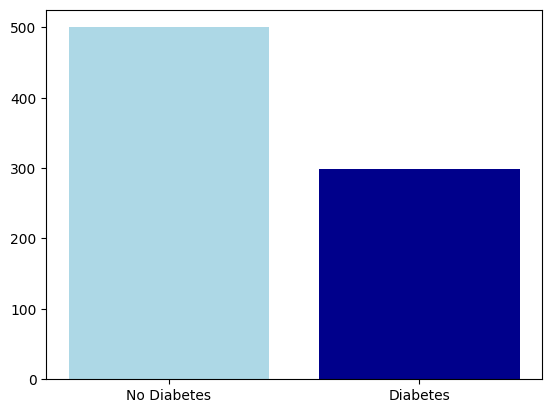

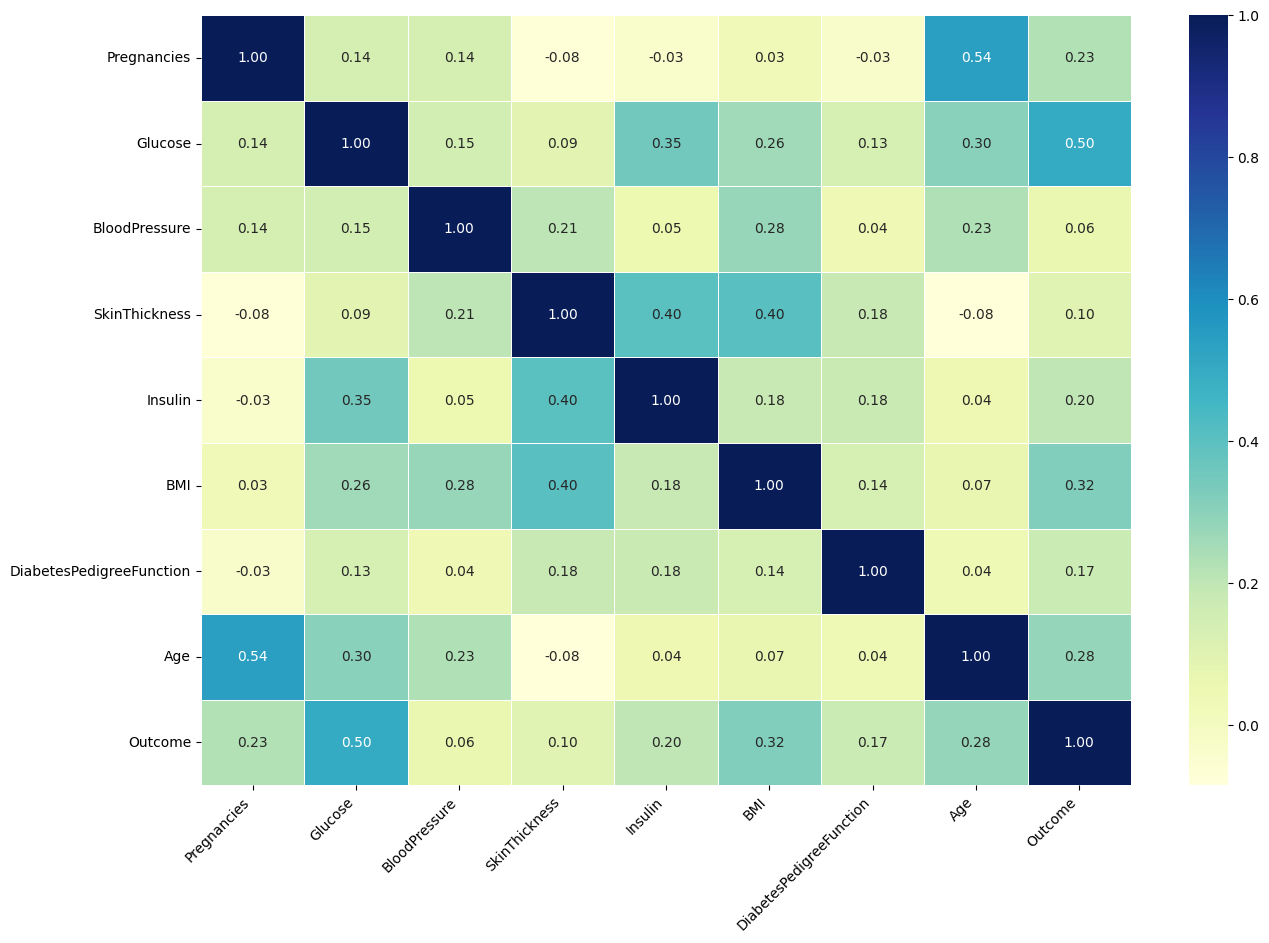

In [2]:
# Czy podział wyników jest równomierny
outcome_column = dataset[:, -1]
unique_outcomes, outcome_counts = np.unique(outcome_column, return_counts=True)
plt.bar(unique_outcomes, outcome_counts, color=["lightblue", "darkblue"])
plt.xticks(unique_outcomes, ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

# Mapa korelacji
corr_matrix = np.corrcoef(dataset.T)
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
ax.set_xticklabels(column_names, rotation=45, ha="right")
ax.set_yticklabels(column_names, rotation=0)
plt.show()

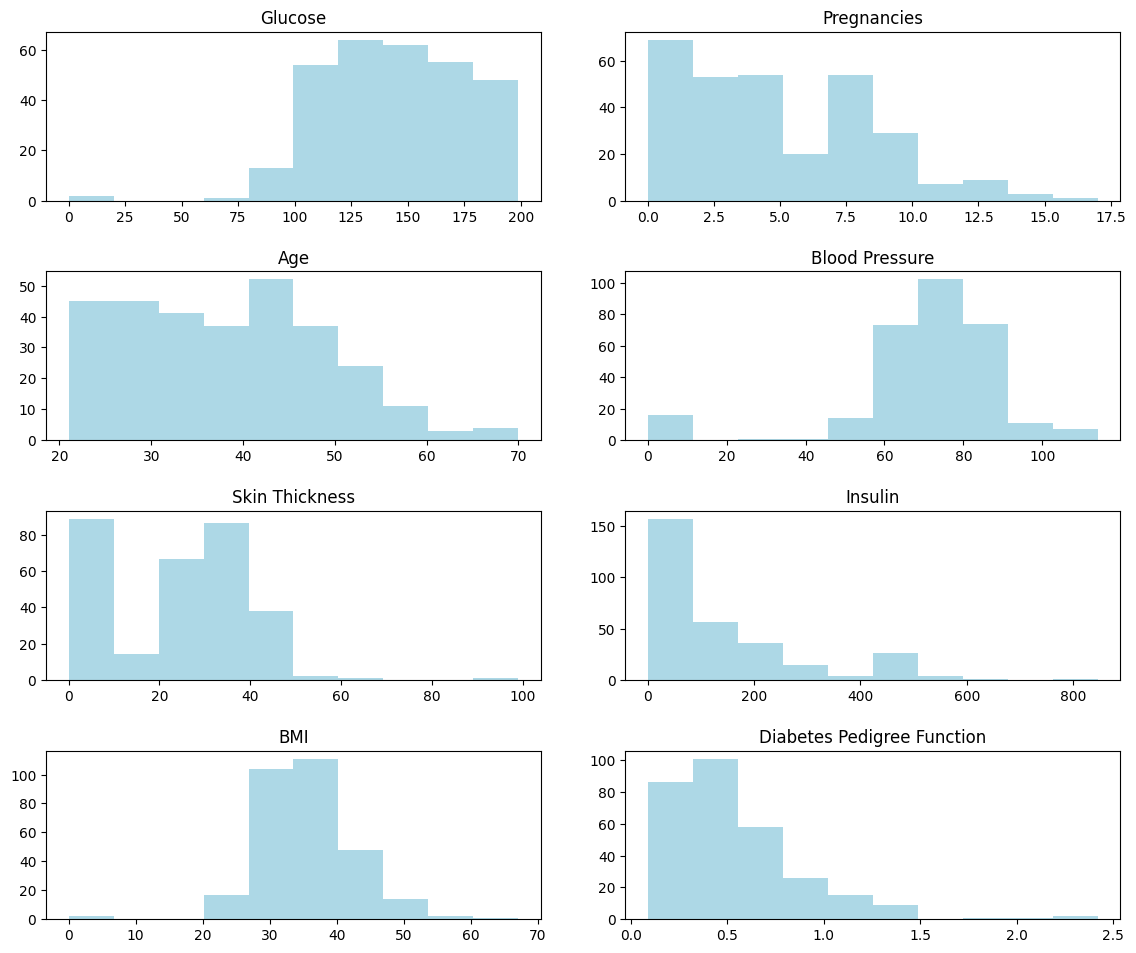

In [3]:
# Wykresy ile razy występuje dana cecha
X = dataset[:, :-1]
y = dataset[:, -1]
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Plot 1 - Glucose
ax[0, 0].set_title('Glucose')
ax[0, 0].hist(X[y == 1, 1], color="lightblue")

# Plot 2 - Pregnancies
ax[0, 1].set_title('Pregnancies')
ax[0, 1].hist(X[y == 1, 0], color="lightblue")

# Plot 3 - Age
ax[1, 0].set_title('Age')
ax[1, 0].hist(X[y == 1, 7], color="lightblue")

# Plot 4 - Blood Pressure
ax[1, 1].set_title('Blood Pressure')
ax[1, 1].hist(X[y == 1, 2], color="lightblue")

# Plot 5 - Skin Thickness
ax[2, 0].set_title('Skin Thickness')
ax[2, 0].hist(X[y == 1, 3], color="lightblue")

# Plot 6 - Insulin
ax[2, 1].set_title('Insulin')
ax[2, 1].hist(X[y == 1, 4], color="lightblue")

# Plot 7 - BMI
ax[3, 0].set_title('BMI')
ax[3, 0].hist(X[y == 1, 5], color="lightblue")

# Plot 8 - Diabetes Pedigree Function
ax[3, 1].set_title('Diabetes Pedigree Function')
ax[3, 1].hist(X[y == 1, 6], color="lightblue")
plt.show()

In [4]:
# Podział na dane wejściowe i wyjściowe
X = dataset[:, :8]
y = dataset[:, 8]

# Dodanie cech interakcyjnych
interaction_1 = X[:, 0] * X[:, 1]
interaction_2 = X[:, 2] * X[:, 3]
X = np.column_stack((X, interaction_1, interaction_2))

# Normalizacja danych wejściowych
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Podział na zbiór uczący i testowy
split_index = int(len(dataset) * 2 / 3)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Definicja modelu sieci neuronowej
model = Sequential()
model.add(BatchNormalization(input_shape=(X.shape[1],)))
model.add(Dense(20, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                        

In [6]:
# Kompilacja modelu
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trenowanie modelu

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Testowanie modelu
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/100
43/43 [==============================] - 2s 6ms/step - loss: 0.7054 - accuracy: 0.4165 - val_loss: 0.6914 - val_accuracy: 0.6168
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5059 - val_loss: 0.6775 - val_accuracy: 0.8037
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6071 - val_loss: 0.6601 - val_accuracy: 0.7850
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.6424 - val_loss: 0.6482 - val_accuracy: 0.7850
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6541 - val_loss: 0.6324 - val_accuracy: 0.8131
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.6306 - val_loss: 0.6183 - val_accuracy: 0.7850
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6400 - val_loss: 0.6024 - val_accuracy: 0.7944
Epoch 8/100
4

In [7]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.705428,0.416471,0.691427,0.616822,0
1,0.689633,0.505882,0.677526,0.803738,1
2,0.682474,0.607059,0.660130,0.785047,2
3,0.676636,0.642353,0.648171,0.785047,3
4,0.663844,0.654118,0.632394,0.813084,4
...,...,...,...,...,...
95,0.523386,0.731765,0.439350,0.813084,95
96,0.532879,0.720000,0.442349,0.822430,96
97,0.530140,0.727059,0.445798,0.831776,97
98,0.513649,0.748235,0.437061,0.831776,98


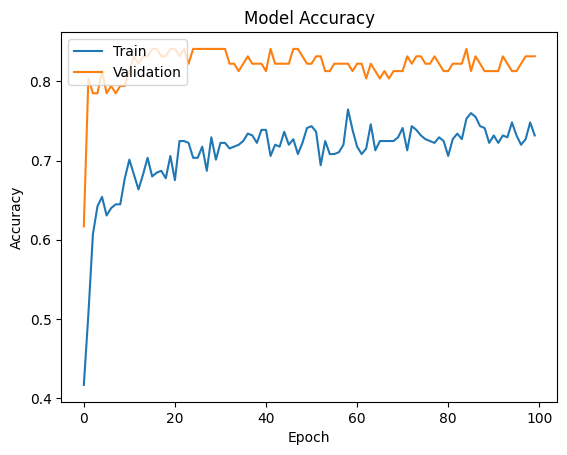

In [8]:
import matplotlib.pyplot as plt


# Wyświetlanie wykresu dokładności treningu i walidacji

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


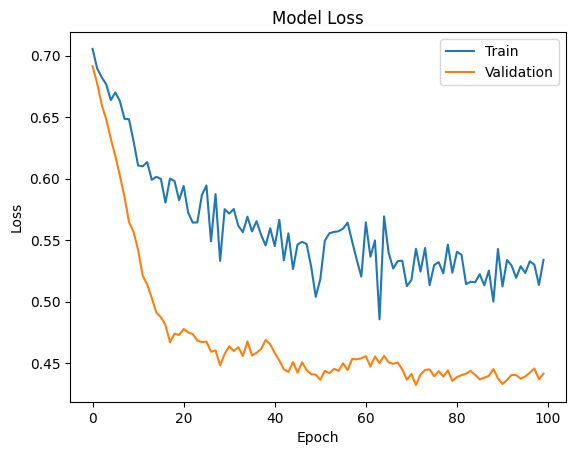

In [9]:
import matplotlib.pyplot as plt

# Wyświetlanie wykresu straty

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [10]:
from sklearn.metrics import precision_score
# Testowanie modelu
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)
precision = precision_score(y_test, y_pred_classes)
print('Precision: %.2f' % precision)

# ...


9/9 [==============================] - 0s 948us/step
Precision: 0.85
